<a href="https://colab.research.google.com/github/DevMed22/slam-dunk-2/blob/soccer-analytics/soccer-analytics/statsbomb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsbombpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.5 MB/s 
     |████████████████████████████████| 152 kB 9.2 MB/s 
     |████████████████████████████████| 127 kB 68.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.9 MB/s 


In [6]:
!pip install highlight_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from statsbombpy import sb 
from mplsoccer.pitch import Pitch,VerticalPitch
from highlight_text import fig_text

## Competitions

In [13]:
com = sb.competitions()

In [14]:
com

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [15]:
com_name = com['competition_name']
com_id = com['competition_id']
season_name = com['season_name']
season_id = com['season_id']

com_dict = dict(zip(com_name,com_id))
season_dict = dict(zip(season_name,season_id))

input :
competition name    list

season name    list 

 button 




In [16]:
com_dict['La Liga']

11

In [17]:
season_dict['2018/2019']

4

## Matches

In [18]:
sb.matches(competition_id=com_dict['La Liga'], season_id=season_dict['2018/2019']).head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,15998,2018-09-26,20:00:00.000,Spain - La Liga,2018/2019,Leganés,Barcelona,2,1,available,...,2021-06-13T16:17:31.694,6,Regular Season,Estadio Municipal de Butarque,Alberto Undiano Mallenco,Mauricio Pellegrino,Ernesto Valverde Tejedor,1.1.0,2,None
1,16029,2018-10-20,20:45:00.000,Spain - La Liga,2018/2019,Barcelona,Sevilla,4,2,available,...,2021-06-13T16:17:31.694,9,Regular Season,Spotify Camp Nou,NaN,Ernesto Valverde Tejedor,Pablo Javier Machín Díez,1.1.0,2,None
2,16073,2018-11-24,20:45:00.000,Spain - La Liga,2018/2019,Atlético Madrid,Barcelona,1,1,available,...,2021-06-13T16:17:31.694,13,Regular Season,Estádio Cívitas Metropolitano,Jesús Gil Manzano,Diego Pablo Simeone,Ernesto Valverde Tejedor,1.1.0,2,None
3,16086,2018-12-08,20:45:00.000,Spain - La Liga,2018/2019,Espanyol,Barcelona,0,4,available,...,2021-06-13T16:17:31.694,15,Regular Season,RCDE Stadium,NaN,Joan Francesc Ferrer Sicilia,Ernesto Valverde Tejedor,1.1.0,2,None
4,16190,2019-02-23,16:15:00.000,Spain - La Liga,2018/2019,Sevilla,Barcelona,2,4,available,...,2021-06-13T16:17:31.694,25,Regular Season,Estadio Ramón Sánchez Pizjuán,Antonio Miguel Mateu Lahoz,Pablo Javier Machín Díez,Ernesto Valverde Tejedor,1.1.0,2,None


In [19]:
x = sb.matches(competition_id=com_dict['La Liga'], season_id=season_dict['2018/2019'])

In [20]:
x.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

In [21]:
def matches_id(data):
  match_id=[]
  match_name=[]
  match_index=np.arange(0,len(data))
  for i in range(len(data)):
    match_id.append(data['match_id'][i])
    match_name.append(data['home_team'][i]+' vs '+data['away_team'][i]+' '+data['competition_stage'][i])
  match_dict_id = dict(zip(match_name,match_id))
  match_dict_index = dict(zip(match_name,match_index))
  return match_name,match_dict_index,match_dict_id


input 

match name

button 

In [22]:
m_name,m_idx,m_dict_id = matches_id(x)

In [23]:
print(m_dict_id[m_name[5]])

16109


In [24]:
print(m_name)

['Leganés vs Barcelona Regular Season', 'Barcelona vs Sevilla Regular Season', 'Atlético Madrid vs Barcelona Regular Season', 'Espanyol vs Barcelona Regular Season', 'Sevilla vs Barcelona Regular Season', 'Barcelona vs Celta Vigo Regular Season', 'Getafe vs Barcelona Regular Season', 'Barcelona vs Real Valladolid Regular Season', 'Real Betis vs Barcelona Regular Season', 'Athletic Club vs Barcelona Regular Season', 'Barcelona vs Real Sociedad Regular Season', 'Barcelona vs Deportivo Alavés Regular Season', 'Barcelona vs Valencia Regular Season', 'Barcelona vs Leganés Regular Season', 'Barcelona vs Atlético Madrid Regular Season', 'Barcelona vs Real Betis Regular Season', 'Barcelona vs Levante Regular Season', 'Barcelona vs Villarreal Regular Season', 'Girona vs Barcelona Regular Season', 'Deportivo Alavés vs Barcelona Regular Season', 'Barcelona vs Huesca Regular Season', 'Eibar vs Barcelona Regular Season', 'Barcelona vs Eibar Regular Season', 'Barcelona vs Rayo Vallecano Regular Seas

In [25]:
def match_data(data,match_index):
  home_team = data['home_team'][match_index]
  away_team = data['away_team'][match_index]
  home_score = data['home_score'][match_index]
  away_score = data['away_score'][match_index]
  stadium = data['stadium'][match_index]
  home_maneger = data['home_managers'][match_index]
  away_maneger = data['away_managers'][match_index]
  comp_stats = data['competition_stage'][match_index]
  return home_team,away_team,home_score,away_score,stadium,home_maneger,away_maneger,comp_stats

In [26]:
h,w,s1,s2,stad,h_m,a_m,c_s = match_data(x,m_idx[m_name[5]])

In [27]:
print(h,w,s1,s2,stad,h_m,a_m,c_s)

Barcelona Celta Vigo 2 0 Spotify Camp Nou Ernesto Valverde Tejedor José Miguel Azevedo Cardoso Regular Season


home team               |             away team

home score              |             away team

                    stadium 

                     refree

home manager           |             away manager

                  competition stats

lineup
...                                    ...........





  https://www.google.com/search?q=premier+league&sxsrf=ALiCzsa-LQGu9nQZE8SJKXh8Mt79H5urNA%3A1664489375046&ei=nxc2Y6WzAp-C9u8PndOxqAc&oq=pre&gs_lcp=Cgdnd3Mtd2l6EAMYADIECCMQJzIECCMQJzIECCMQJzIKCC4QsQMQgwEQQzIHCAAQsQMQQzIECAAQQzIECAAQQzIECAAQQzIECC4QQzIECAAQQzoKCAAQRxDWBBCwAzoHCAAQsAMQQzoNCAAQ5AIQ1gQQsAMYAToMCC4QyAMQsAMQQxgCOg8ILhDUAhDIAxCwAxBDGAI6BwguELEDEEM6CAguELEDEIMBOgUIABCABDoLCAAQgAQQsQMQgwE6EQguEIAEELEDEIMBEMcBENEDSgQIQRgASgQIRhgBUMwKWPYQYIAiaARwAXgAgAGVAYgBngKSAQMwLjKYAQCgAQHIARPAAQHaAQYIARABGAnaAQYIAhABGAg&sclient=gws-wiz#sie=m;/g/11s38h46j3;2;/m/02_tc;ln;fp;1;;;

## Lineup

In [28]:
sb.lineups(match_id=m_dict_id[m_name[5]])[w]

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,3625,Sofiane Boufal,None,19,Morocco,[],"[{'position_id': 16, 'position': 'Left Midfiel..."
1,5217,Iago Aspas Juncal,Iago Aspas,10,Spain,"[{'time': '44:56', 'card_type': 'Yellow Card',...","[{'position_id': 22, 'position': 'Right Center..."
2,5516,Pione Sisto Ifolo Emirmija,Pione Sisto,11,Denmark,[],"[{'position_id': 12, 'position': 'Right Midfie..."
3,6297,Maximiliano Gómez González,Maxi Gómez,9,Uruguay,[],"[{'position_id': 24, 'position': 'Left Center ..."
4,6794,Gustavo Daniel Cabral Cáceres,Gustavo Cabral,22,Argentina,[],[]
5,6795,Rubén Blanco Veiga,Rubén Blanco,13,Spain,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
6,6798,Stanislav Lobotka,None,14,Slovakia,[],"[{'position_id': 13, 'position': 'Right Center..."
7,6799,Brais Méndez Portela,Brais Méndez,23,Spain,[],"[{'position_id': 12, 'position': 'Right Midfie..."
8,6805,Hugo Mallo Novegil,Hugo Mallo,2,Spain,[],"[{'position_id': 2, 'position': 'Right Back', ..."
9,6852,Jozabed Sánchez Ruiz,Jozabed Sánchez,21,Spain,[],"[{'position_id': 15, 'position': 'Left Center ..."


## Events

In [103]:
'Interception'          

'Interception'

In [60]:
events = sb.events(match_id=m_dict_id[m_name[5]], split=True, flatten_attrs=False)

In [102]:
events

defaultdict(list,
            {'starting_xis':                                      id  index  period     timestamp  minute  \
             0  29e09607-2404-485f-81ad-f1771bf9ce9b      1       1  00:00:00.000       0   
             1  d4d2e69a-9c7e-43b6-be09-63a2d49c0264      2       1  00:00:00.000       0   
             
                second         type  possession possession_team  play_pattern        team  \
             0       0  Starting XI           1       Barcelona  Regular Play   Barcelona   
             1       0  Starting XI           1       Barcelona  Regular Play  Celta Vigo   
             
                duration                                            tactics  match_id  \
             0       0.0  {'formation': 41221, 'lineup': [{'player': {'i...     16109   
             1       0.0  {'formation': 442, 'lineup': [{'player': {'id'...     16109   
             
                possession_team_id  
             0                 217  
             1           

In [96]:
events['passes']

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,location,duration,related_events,pass,match_id,possession_team_id,player_id,under_pressure,counterpress,off_camera
0,bb9af384-a7cd-4eca-b18a-1477afc77555,5,1,00:00:00.322,0,0,Pass,2,Barcelona,From Kick Off,...,"[61.0, 41.0]",1.060803,[4350d8c8-49d5-4b02-bbd7-ed42f33a2adf],"{'recipient': {'id': 5203, 'name': 'Sergio Bus...",16109,217,5246,NaN,NaN,NaN
1,78ecc3b7-6acd-4f3b-bab8-874a2ae60b93,8,1,00:00:02.475,0,2,Pass,2,Barcelona,From Kick Off,...,"[50.0, 43.0]",1.803328,[09bab4a7-359d-48fd-a702-43242f139d47],"{'recipient': {'id': 6374, 'name': 'Nélson Cab...",16109,217,5203,NaN,NaN,NaN
2,a30b490f-8f60-4647-b39f-5b393a9cded2,11,1,00:00:05.557,0,5,Pass,2,Barcelona,From Kick Off,...,"[49.0, 67.0]",1.186417,[0aa4865e-353b-42be-82b2-bcf7eda73334],"{'recipient': {'id': 5213, 'name': 'Gerard Piq...",16109,217,6374,NaN,NaN,NaN
3,82e91704-3c18-4e01-a134-b9a993aa2ea1,14,1,00:00:07.845,0,7,Pass,2,Barcelona,From Kick Off,...,"[36.0, 53.0]",1.503518,[659c9ede-ce7e-47e0-b97f-a1a245062bf7],"{'recipient': {'id': 6826, 'name': 'Clément Le...",16109,217,5213,NaN,NaN,NaN
4,95d5a57e-7f84-45b8-b50a-019742d06509,17,1,00:00:12.354,0,12,Pass,2,Barcelona,From Kick Off,...,"[39.0, 24.0]",1.440457,[1533b8bf-d806-408e-a65a-0e734e34d441],"{'recipient': {'id': 5213, 'name': 'Gerard Piq...",16109,217,6826,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,857771a7-d494-44ac-a244-22b89b412766,4199,2,00:48:02.933,93,2,Pass,208,Celta Vigo,From Free Kick,...,"[109.0, 31.0]",0.479074,"[8514e494-2622-4187-b2cb-394388b0bc4f, 9dea6cf...","{'recipient': {'id': 11389, 'name': 'Francisco...",16109,209,11388,NaN,NaN,NaN
1125,9dea6cf0-3c53-4a1b-8e7c-9eca17e3cbc9,4201,2,00:48:03.412,93,3,Pass,209,Barcelona,Regular Play,...,"[11.0, 43.0]",0.732110,"[267a4fe1-b016-4f10-9ae0-b9aece0ae8f2, 857771a...","{'recipient': {'id': 13599, 'name': 'Carles Al...",16109,217,5470,NaN,NaN,NaN
1126,99cd8b2d-2822-4c26-945d-95651baea339,4204,2,00:48:04.648,93,4,Pass,209,Barcelona,Regular Play,...,"[13.0, 48.0]",0.744122,[9d3f1e90-78f3-44cc-83c5-d38f3db83ffe],"{'recipient': {'id': 11392, 'name': 'Arthur He...",16109,217,13599,NaN,NaN,NaN
1127,2d6faee8-781e-44dd-876e-9d8bf3eda8a8,4207,2,00:48:05.458,93,5,Pass,209,Barcelona,Regular Play,...,"[21.0, 49.0]",0.472688,[10328cb4-b8ad-4336-9279-97894e941ada],"{'recipient': {'id': 5213, 'name': 'Gerard Piq...",16109,217,11392,NaN,NaN,NaN


In [66]:
events['shots']['possession_team'][5]

'Celta Vigo'

Text(0.22, 0.14, '@DevMed22 / Github')

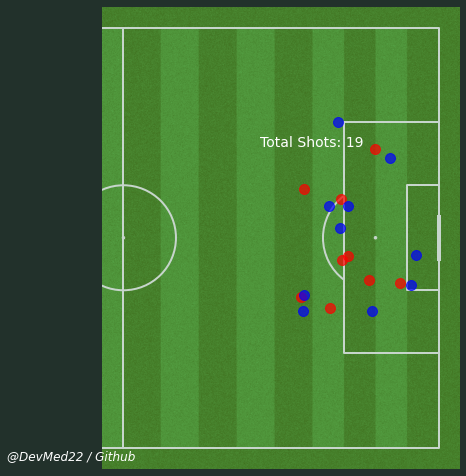

In [89]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', half=True,
              pitch_color='grass', line_color='#c7d5cc',stripe = True)

pitch.draw(ax=ax)

#I invert the axis to make it so I am viewing it how I want
plt.gca().invert_yaxis()

#plot the points, you can use a for loop to plot the different outcomes if you want
x_h=[]
y_h=[]
x_w=[]
y_w=[]
for i,shot in events['shots'].iterrows():
  if events['shots']['possession_team'][i]==h:
    x_h.append(shot['location'][0])
    y_h.append(shot['location'][1])
  elif events['shots']['possession_team'][i]==w:
    x_w.append(shot['location'][0])
    y_w.append(shot['location'][1]) 

# for i,shot in events['shots'][].iterrows():
#     x.append(shot['location'][0])
#     y.append(shot['location'][1])
    
plt.scatter(x_h,y_h, s=100,c='red',alpha=.7)

plt.scatter(x_w,y_w, s=100,c='blue',alpha=.7)

# s=f'{h} Shots vs {w}'
# fig_text(s=s,
#         x=.27,y=.9,
#         fontfamily='Andale Mono',
#         fontsize=24,
#         color=text_color)

total_shots = len(events['shots'])

fig_text(s=f'Total Shots: {total_shots}',
        x=.49, y =.67, fontsize=14,fontfamily='Andale Mono',color='white')

fig.text(.22,.14,f'@DevMed22 / Github',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color='white')

#plt.savefig('bcnjuveshots.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')

Text(0.22, 0.14, '@DevMed22 / Github')

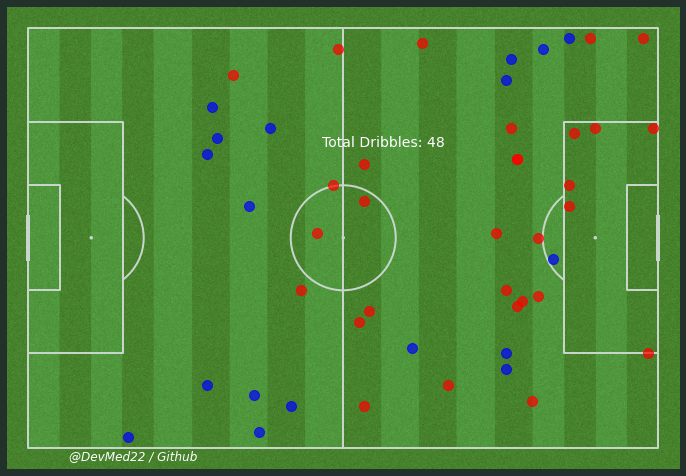

In [90]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', 
              pitch_color='grass', line_color='#c7d5cc',stripe = True)

pitch.draw(ax=ax)

#I invert the axis to make it so I am viewing it how I want
plt.gca().invert_yaxis()

#plot the points, you can use a for loop to plot the different outcomes if you want
x_h=[]
y_h=[]
x_w=[]
y_w=[]
for i,shot in events['dribbles'].iterrows():
  if events['dribbles']['possession_team'][i]==h:
    x_h.append(shot['location'][0])
    y_h.append(shot['location'][1])
  elif events['dribbles']['possession_team'][i]==w:
    x_w.append(shot['location'][0])
    y_w.append(shot['location'][1]) 

# for i,shot in events['shots'][].iterrows():
#     x.append(shot['location'][0])
#     y.append(shot['location'][1])
    
plt.scatter(x_h,y_h, s=100,c='red',alpha=.7)

plt.scatter(x_w,y_w, s=100,c='blue',alpha=.7)

# s=f'{h} Shots vs {w}'
# fig_text(s=s,
#         x=.27,y=.9,
#         fontfamily='Andale Mono',
#         fontsize=24,
#         color=text_color)

total_shots = len(events['dribbles'])

fig_text(s=f'Total Dribbles: {total_shots}',
        x=.49, y =.67, fontsize=14,fontfamily='Andale Mono',color='white')

fig.text(.22,.14,f'@DevMed22 / Github',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color='white')

#plt.savefig('bcnjuveshots.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')

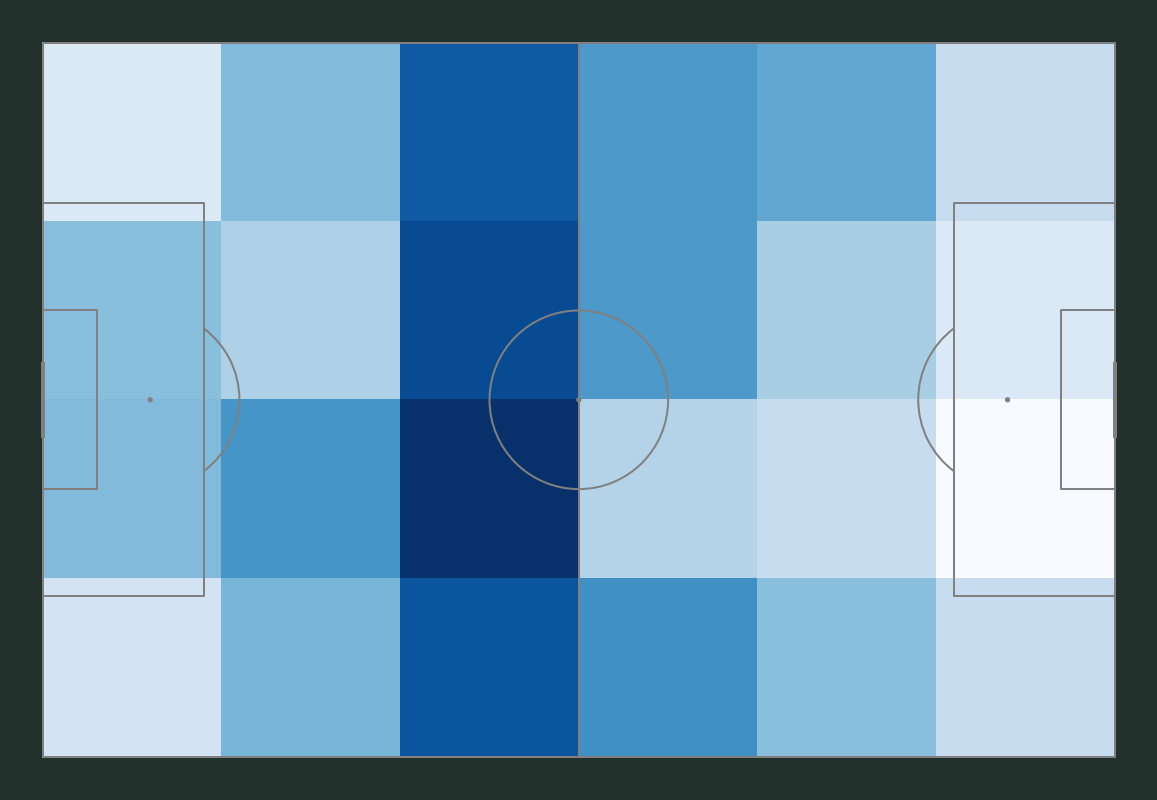

In [95]:
x_h=[]
y_h=[]

for i,shot in events['passes'].iterrows():
  if events['passes']['possession_team'][i]==h:
    x_h.append(shot['location'][0])
    y_h.append(shot['location'][1])

pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='gray', pitch_color='#22312b')
bins = (6, 4)

fig.text(.22,.14,f'@DevMed22 / Github',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color='white')

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square

bs_heatmap = pitch.bin_statistic(x_h, y_h, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')

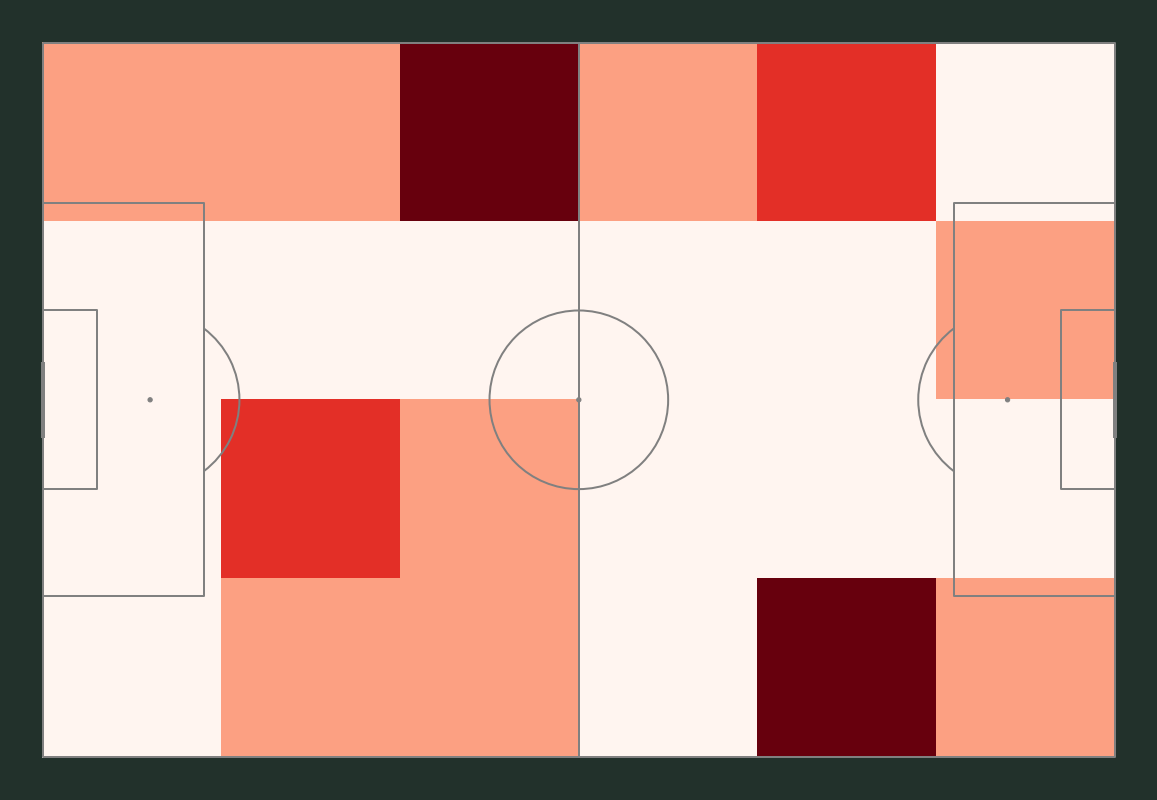

In [101]:
x_w=[]
y_w=[]
for i,shot in events['dribbles'].iterrows():
  if events['dribbles']['possession_team'][i]==w:
    x_w.append(shot['location'][0])
    y_w.append(shot['location'][1]) 

pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='gray', pitch_color='#22312b')
bins = (6, 4)

fig.text(.22,.14,f'@DevMed22 / Github',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color='yellow')

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square

bs_heatmap = pitch.bin_statistic(x_w, y_w, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Reds')

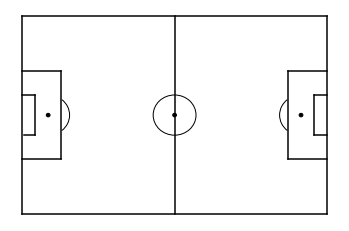

In [113]:
def createPitch():
    
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    #Display Pitch
    plt.show()
    
createPitch()

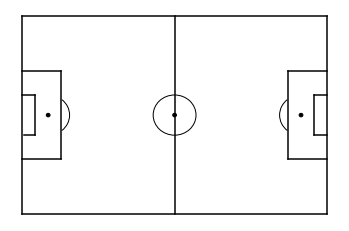

ValueError: ignored

In [123]:
#Draw the pitch
pitchLengthX=120
pitchWidthY=80

ax= createPitch()

#Plot the shots
for i,shot in events['shots'].iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    # goal=shot['shot_outcome_name']=='Goal'
    # team_name=shot['team_name']
    
    circleSize=2
    #circleSize=np.sqrt(shot['shot_statsbomb_xg'])*12

    if (events['shots']['possession_team']==h):
        # if goal:
        #     shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
        #     plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        # else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (events['shots']['possession_team']==w):
        # if goal:
        #     shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
        #     plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        # else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    